In [3]:
from scipy import integrate
from scipy.stats import norm
import numpy as np

### UTILS

In [5]:
def normalDist(x, mu, sigma, mean=False, meanSqrX=False):
  normalFactor = 1/(sigma * np.sqrt(2 * np.pi))
  expFactor = np.exp(-(1/2) * (((x - mu)/sigma) ** 2))
  if mean: return x * normalFactor * expFactor
  if meanSqrX: return (x**2) * normalFactor * expFactor
  return normalFactor * expFactor

def uniformDist(x, a, b, mean=False, meanSqrX=False):
  if (a <= x and x <= b):
    if mean: return x/(b-a)
    if meanSqrX: return (x**2)/(b-a)
    return 1/(b-a)
  return 0

def exponDist(x, l, mean=False, meanSqrX=False):
  if (x >= 0): 
    if mean: return x * (1/l) * np.exp(-(1/l) * x)
    if meanSqrX: return (x**2) * (1/l) * np.exp(-(1/l) * x)
    return (1/l) * np.exp(-(1/l) * x)
  return 0

def meanProbabFunction(probabFunction, args):
  if probabFunction == 'exponDist':
    return integrate.quad(exponDist, -np.inf, np.inf, args=(args['l'], args['mean'], args['meanSqrX']))
  elif probabFunction == 'uniformDist':
    return integrate.quad(uniformDist, -np.inf, np.inf, args=(args['a'], args['b'], args['mean'], args['meanSqrX']))
  elif probabFunction == 'normalDist':
    return integrate.quad(normalDist, -np.inf, np.inf, args=(args['mu'], args['sigma'],  args['mean'], args['meanSqrX']))
  return False

def expectedValue(xPx):
  return np.sum([xPx[i][0] * xPx[i][1] for i in range(len(xPx))])

# Simulado 

In [7]:
l = 23
Ia = integrate.quad(exponDist, l, np.inf, args=(l))[0]
print(Ia)

m = meanProbabFunction('exponDist', args={'l':l, 'mean':True, 'meanSqrX':False})[0]
m2 = meanProbabFunction('exponDist', args={'l':l, 'mean':False,'meanSqrX':True})[0]
v = m2 - m**2
print(v)

0.3678794411714413
529.0000000000001


In [8]:
# cov(a,b) = E[ab] - E[a]E[b]

xPx = [
    (-1,0.2),
    (0,0.6),
    (1,0.2)
]

yPy = [
    (-1,0.2),
    (0,0.6),
    (1,0.2)
]

xyPxy = [
    (0, 1),
    (0, 0.2),
    (-1, 0),
    (0, 0.2),
    (0, 0.2),
    (0, 0.2),
    (-1, 0),
    (0, 0.2),
    (1, 0),
]

Ex = expectedValue(xPx)
Ey = expectedValue(yPy)
Exy = expectedValue(xyPxy)
covXY = Exy - Ex*Ey
print(covXY) 

0.0


# Lista 3

### Exercicio 1

In [116]:
mu = 2
sigma = 0.4

Ia = integrate.quad(normalDist, -np.inf, 1.8, args=(mu,sigma))[0]
print(Ia)

Ib = integrate.quad(normalDist, 1.8, 2.1, args=(mu,sigma))[0]
print(Ib)

Ic = integrate.quad(normalDist, 2.3, np.inf, args=(mu, sigma))[0]
print(Ic)


0.3085375387259873
0.29016878695693693
0.22662735237686837


### Exercicio 3

In [117]:
l = 8

Ia = integrate.quad(exponDist, 10, np.inf, args=(l))[0]
print(Ia)

Ib = integrate.quad(exponDist, -np.inf, l, args=(l))[0]
print(Ib)

Ic = integrate.quad(exponDist, 5, 11, args=(l))[0]
print(Ic)

0.2865047968601901
0.6321205588282045
0.2824218327142438


### Exercicio 5

In [122]:
m = meanProbabFunction('uniformDist', args={'a':5, 'b':7, 'mean': True, 'meanSqrX':False})[0]
print(m)

Ex2 = meanProbabFunction('uniformDist', args={'a':5, 'b':7, 'mean': False, 'meanSqrX':True})[0]
v = Ex2 - m**2
print(v)

5.999999999999957
0.33333333333329307


### Exercicio 6

In [142]:
mu = 29.5
sigma = 2.5

perc = 0.05
cum = 0
t0 = 0.001
dt = 0.0005
while cum < perc:
  I = integrate.quad(normalDist, t0, t0+dt, args=(mu, sigma))[0]
  t0+=dt
  cum+=I

print(t0)

25.38799999998618


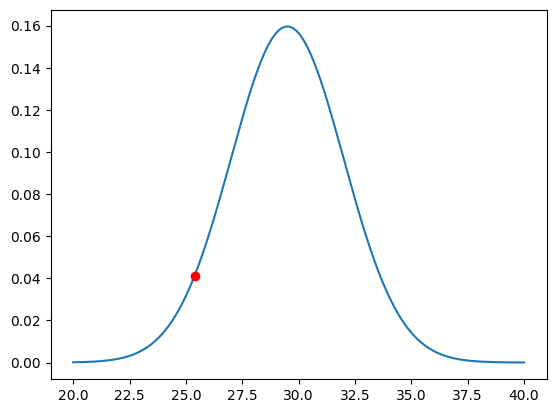

In [143]:
import matplotlib.pyplot as plt
x = np.linspace(20, 40, 1000)
plt.plot(x, normalDist(x, mu, sigma))
plt.plot(t0, normalDist(t0, mu, sigma), 'or')
plt.show()

### Exercicio 8

In [144]:
a = 345
b = 355
Ia = integrate.quad(uniformDist, 353, np.inf, args=(a,b))[0]
print(Ia)

Ib = integrate.quad(uniformDist, -np.inf, 346, args=(a,b))[0]
print(Ib)

rotulo = 350
Ic = 1 - integrate.quad(uniformDist, rotulo-4, rotulo+4, args=(a,b))[0]
print(Ic)

0.20000000000023335
0.1
0.19999999999999984


### Exercicio 9

In [149]:
l = 12
Ia = integrate.quad(exponDist, 10, np.inf, args=(l))[0]
print(Ia)

Ib = integrate.quad(exponDist, 0, 8, args=(l))[0]
print(Ib)

0.43459820850707837
0.48658288096740787


### Exercicio 11

In [174]:
mu = 1000
perc = 0.01
limite = 990
dt = 0.005
for sigma in np.linspace(1,5,10):
  t0 = 0.001
  cum = 0
  while cum < perc:
    I = integrate.quad(normalDist, t0, t0+dt, args=(mu, sigma))[0]
    t0+=dt
    cum+=I
  print(t0, sigma)
  if (t0 < limite): break

997.6759999991651 1.0
996.6409999991661 1.4444444444444444
995.605999999167 1.8888888888888888
994.575999999168 2.333333333333333
993.5409999991689 2.7777777777777777
992.5059999991698 3.2222222222222223
991.4709999991708 3.6666666666666665
990.4409999991717 4.111111111111111
989.4059999991726 4.555555555555555


In [175]:
for sigma in np.linspace(4.1,4.5,10):
  t0 = 0.001
  cum = 0
  while cum < perc:
    I = integrate.quad(normalDist, t0, t0+dt, args=(mu, sigma))[0]
    t0+=dt
    cum+=I
  print(t0, sigma)
  if (t0 < limite): break

990.4659999991717 4.1
990.3609999991718 4.144444444444444
990.2559999991719 4.188888888888888
990.155999999172 4.233333333333333
990.0509999991721 4.277777777777778
989.9459999991722 4.322222222222222


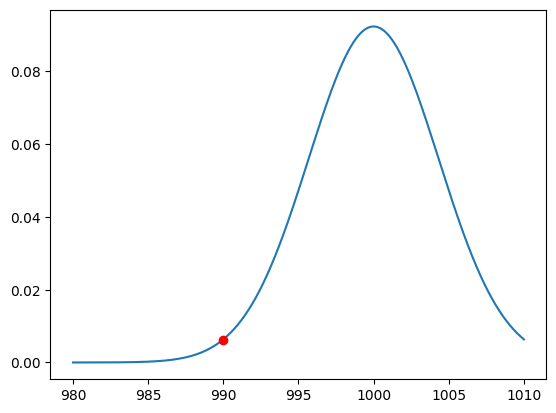

In [176]:
x = np.linspace(980, 1010, 1000)
plt.plot(x, normalDist(x, mu, sigma))
plt.plot(t0, normalDist(t0, mu, sigma), 'or')
plt.show()

### Exercicio 14

In [9]:
# cov(a,b) = E[ab] - E[a]E[b]

xPx = [
    (0,np.sum([1/12, 1/8, 1/24, 1/12])),
    (1,np.sum([1/60, 1/12, 1/24, 1/40])),
    (2,np.sum([7/40, 1/30, 1/4, 1/24]))
]

yPy = [
    (0,np.sum([1/12, 1/60, 7/40])),
    (1,np.sum([1/8, 1/12, 1/30])),
    (2,np.sum([1/24, 1/24, 1/4])),
    (3,np.sum([1/12, 1/40, 1/24]))
]

xyPxy = [
    (0, 1/12),
    (0, 1/60),
    (0, 7/40),
    (0, 1/8),
    (1, 1/12),
    (2, 1/30),
    (0, 1/24),
    (2, 1/24),
    (4, 1/4),
    (0, 1/12),
    (3, 1/40),
    (6, 1/24),
]

Ex = expectedValue(xPx)
Ey = expectedValue(yPy)
Exy = expectedValue(xyPxy)
covXY = Exy - Ex*Ey
print(covXY) 

-0.026388888888888795
